Imagina que trabajas en el departamento de análisis de datos de
una empresa minorista. Te han proporcionado un conjunto de
datos que contiene información sobre las ventas de productos en
diferentes tiendas durante eI último trimestre. Tu tarea es
limpiar, analizar, y generar algunos resúmenes estadísticos
básicos sobre el rendimiento de las ventas.



ID del producto: Identificador único del producto.
Nombre del Producto: Nombre del producto.
Tienda: Nombre de la tienda donde se realizó la venta.
Ventas: Número de unidades vendidas.
Precio Unitario: Precio de una unidad del producto.
Fecha de Venta: Fecha en la que se realizó la venta.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Datos simulados
data = {
    'ID del producto': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Nombre del producto': ['Producto 1', 'Producto 2', 'Producto 3', 'Producto 4', 'Producto 5', 'Producto 6', 
                            'Producto 7', 'Producto 8', 'Producto 9', 'Producto 10', 'Producto 11', 'Producto 12',
                            'Producto 13', 'Producto 14', 'Producto 15', 'Producto 16', 'Producto 17', 'Producto 18',
                            'Producto 19', 'Producto 20'],
    'Tienda': ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4', 'tienda 5', 'tienda 6', 'tienda 7', 'tienda 8', 'tienda 9',
               'tienda 10', 'tienda 1', 'tienda 2', 'tienda 3', 'tienda 4', 'tienda 5', 'tienda 6', 'tienda 7', 'tienda 8', 
               'tienda 9', 'tienda 10'],
    'Ventas': [10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 45, 15, 18, 65, 23, 16, 17, 47, 89, 21],
    'Precio Unitario': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900],
    'Fecha de venta': ['2024-09-02', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-08', '2024-09-09', '2024-09-10', 
                       '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-12', '2024-09-21', '2024-09-22', 
                       '2024-09-23', '2024-09-15', '2024-09-18', '2024-09-19', '2024-09-01', '2024-09-13']
}

# Crear el DataFrame
df = pd.DataFrame(data)

print(df)


    ID del producto Nombre del producto     Tienda  Ventas  Precio Unitario  \
0                 1          Producto 1   tienda 1      10             1000   
1                 2          Producto 2   tienda 2      12             1100   
2                 3          Producto 3   tienda 3      13             1200   
3                 4          Producto 4   tienda 4      14             1300   
4                 5          Producto 5   tienda 5      15             1400   
5                 6          Producto 6   tienda 6      16             1500   
6                 7          Producto 7   tienda 7      17             1600   
7                 8          Producto 8   tienda 8      18             1700   
8                 9          Producto 9   tienda 9      19             1800   
9                10         Producto 10  tienda 10      20             1900   
10               11         Producto 11   tienda 1      45             1000   
11               12         Producto 12   tienda 2  

In [20]:
# visualizar las primeras filas
df.head()

,ID del producto,Nombre del producto,Tienda,Ventas,Precio Unitario,Fecha de venta
0,1,Producto 1,tienda 1,10,1000,2024-09-02
1,2,Producto 2,tienda 2,12,1100,2024-09-04
2,3,Producto 3,tienda 3,13,1200,2024-09-05
3,4,Producto 4,tienda 4,14,1300,2024-09-06
4,5,Producto 5,tienda 5,15,1400,2024-09-08


In [22]:
# para verificar la informacion del dataframe se utiliza el .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID del producto      20 non-null     int64 
 1   Nombre del producto  20 non-null     object
 2   Tienda               20 non-null     object
 3   Ventas               20 non-null     int64 
 4   Precio Unitario      20 non-null     int64 
 5   Fecha de venta       20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


In [24]:
#para averiguar si hay valores faltantes se usa el .isnull
valores_faltantes = df.isnull().sum()
valores_faltantes

ID del producto        0
Nombre del producto    0
Tienda                 0
Ventas                 0
Precio Unitario        0
Fecha de venta         0
dtype: int64

In [26]:
# Averiguar si los tipos de datos son correctos
df.dtypes

ID del producto         int64
Nombre del producto    object
Tienda                 object
Ventas                  int64
Precio Unitario         int64
Fecha de venta         object
dtype: object

In [28]:
# Pasar la fecha de venta que esta en object a su verdadero tipo de dato
df['Fecha de venta'] = pd.to_datetime(df['Fecha de venta'])


In [32]:
df.dtypes #verificar el cambio

ID del producto                 int64
Nombre del producto            object
Tienda                         object
Ventas                          int64
Precio Unitario                 int64
Fecha de venta         datetime64[ns]
dtype: object

In [34]:
# Generar estadísticas descriptivas para las columnas numéricas utilizando el .describe
estadisticas_descriptivas = df[['Ventas', 'Precio Unitario']].describe()

# Mostrar las estadísticas 
estadisticas_descriptivas

,Ventas,Precio Unitario
count,20.000000,20.000000
mean,25.500000,1450.000000
std,20.394788,294.689846
min,10.000000,1000.000000
25%,15.000000,1200.000000
50%,17.500000,1450.000000
75%,21.500000,1700.000000
max,89.000000,1900.000000


In [48]:
# Calcular el total de ventas por producto
total_ventas_por_producto = df.groupby('Nombre del producto')['Ventas'].sum()

# Calcular los ingresos totales por producto
# Primero, calcular los ingresos por cada fila
df['Ingresos'] = df['Ventas'] * df['Precio Unitario']
# Luego, sumar los ingresos por producto
ingresos_totales_por_producto = df.groupby('Nombre del producto')['Ingresos'].sum()

print("Total de Ventas por Producto:")
print(total_ventas_por_producto)
print("\nIngresos Totales por Producto:")
print(ingresos_totales_por_producto)


Total de Ventas por Producto:
Nombre del producto
Producto 1     10
Producto 10    20
Producto 11    45
Producto 12    15
Producto 13    18
Producto 14    65
Producto 15    23
Producto 16    16
Producto 17    17
Producto 18    47
Producto 19    89
Producto 2     12
Producto 20    21
Producto 3     13
Producto 4     14
Producto 5     15
Producto 6     16
Producto 7     17
Producto 8     18
Producto 9     19
Name: Ventas, dtype: int64

Ingresos Totales por Producto:
Nombre del producto
Producto 1      10000
Producto 10     38000
Producto 11     45000
Producto 12     16500
Producto 13     21600
Producto 14     84500
Producto 15     32200
Producto 16     24000
Producto 17     27200
Producto 18     79900
Producto 19    160200
Producto 2      13200
Producto 20     39900
Producto 3      15600
Producto 4      18200
Producto 5      21000
Producto 6      24000
Producto 7      27200
Producto 8      30600
Producto 9      34200
Name: Ingresos, dtype: int64


In [46]:
# Calcular el total de ventas por tienda
total_ventas = df.groupby('Tienda')['Ventas'].sum()

# Calcular el precio unitario promedio por tienda
precio_unitario_promedio = df.groupby('Tienda')['Precio Unitario'].mean()

print("Total de Ventas por Tienda:")
print(total_ventas)
print("\nPrecio Unitario Promedio por Tienda:")
print(precio_unitario_promedio)

Total de Ventas por Tienda:
Tienda
tienda 1      55
tienda 10     41
tienda 2      27
tienda 3      31
tienda 4      79
tienda 5      38
tienda 6      32
tienda 7      34
tienda 8      65
tienda 9     108
Name: Ventas, dtype: int64

Precio Unitario Promedio por Tienda:
Tienda
tienda 1     1000.0
tienda 10    1900.0
tienda 2     1100.0
tienda 3     1200.0
tienda 4     1300.0
tienda 5     1400.0
tienda 6     1500.0
tienda 7     1600.0
tienda 8     1700.0
tienda 9     1800.0
Name: Precio Unitario, dtype: float64


In [52]:
# Extraer el mes y el año de la fecha para calcular las ventas
df['Mes-Año'] = df['Fecha de venta'].dt.to_period('M')

# Calcular los ingresos por cada fila del producto
df['Ingresos'] = df['Ventas'] * df['Precio Unitario']

# Calcular el total de ventas por mes 
ventas_por_mes = df.groupby('Mes-Año')['Ventas'].sum()

# Calcular los ingresos totales por mes 
ingresos_por_mes = df.groupby('Mes-Año')['Ingresos'].sum()

print("Ventas Totales por Mes:")
print(ventas_por_mes)
print("\nIngresos Totales por Mes:")
print(ingresos_por_mes)

Ventas Totales por Mes:
Mes-Año
2024-09    510
Freq: M, Name: Ventas, dtype: int64

Ingresos Totales por Mes:
Mes-Año
2024-09    763000
Freq: M, Name: Ingresos, dtype: int64


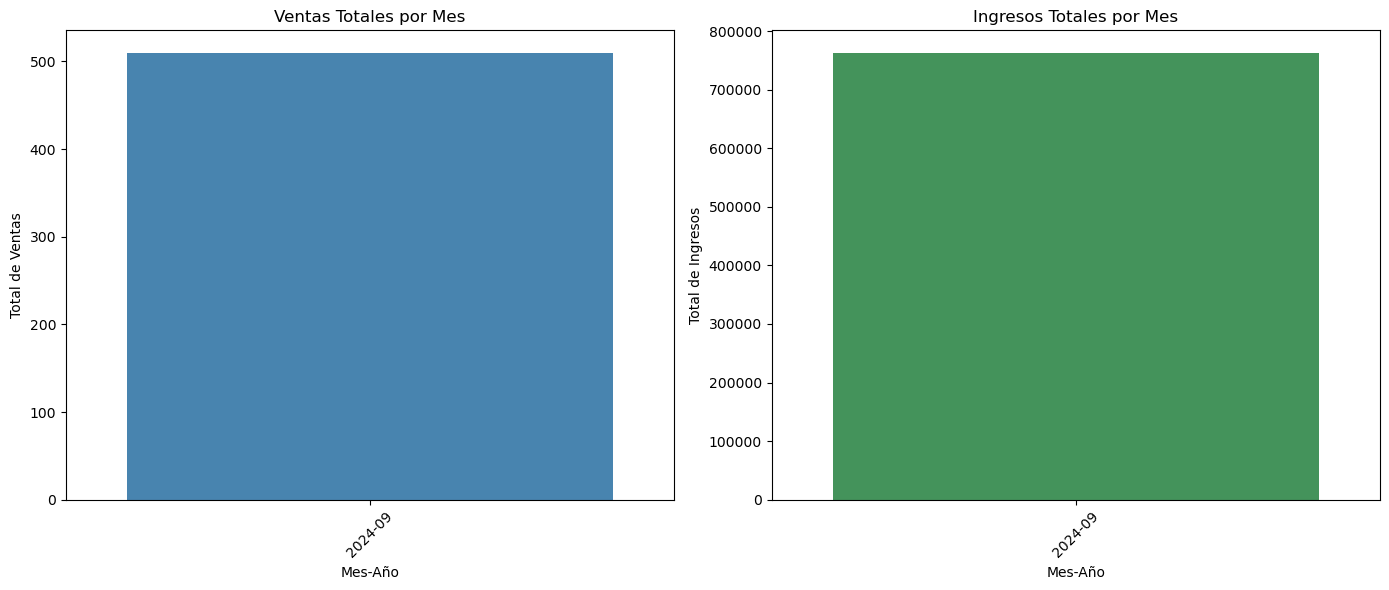

In [60]:
import seaborn as sns

# Extraer el mes y el año de la fecha
df['Mes-Año'] = df['Fecha de venta'].dt.to_period('M')

# Calcular los ingresos por cada fila
df['Ingresos'] = df['Ventas'] * df['Precio Unitario']

# Calcular el total de ventas e ingresos por mes
ventas_por_mes = df.groupby('Mes-Año')['Ventas'].sum()
ingresos_por_mes = df.groupby('Mes-Año')['Ingresos'].sum()

# Crear gráficos de barras
plt.figure(figsize=(14, 6))

# Ventas totales por mes
plt.subplot(1, 2, 1)
sns.barplot(x=ventas_por_mes.index.astype(str), y=ventas_por_mes.values, hue=ventas_por_mes.index.astype(str), palette="Blues_d", legend=False)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)

# Ingresos totales por mes
plt.subplot(1, 2, 2)
sns.barplot(x=ingresos_por_mes.index.astype(str), y=ingresos_por_mes.values, hue=ingresos_por_mes.index.astype(str), palette="Greens_d", legend=False)
plt.title('Ingresos Totales por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\scarp\AppData\Local\Temp\ipykernel_13324\1993826567.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_tienda.index, y=ventas_por_tienda.values, palette="Blues_d")
C:\Users\scarp\AppData\Local\Temp\ipykernel_13324\1993826567.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio_por_tienda.index, y=precio_promedio_por_tienda.values, palette="Purples_d")
C:\Users\scarp\AppData\Local\Temp\ipykernel_13324\1993826567.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_producto.index, y=ventas

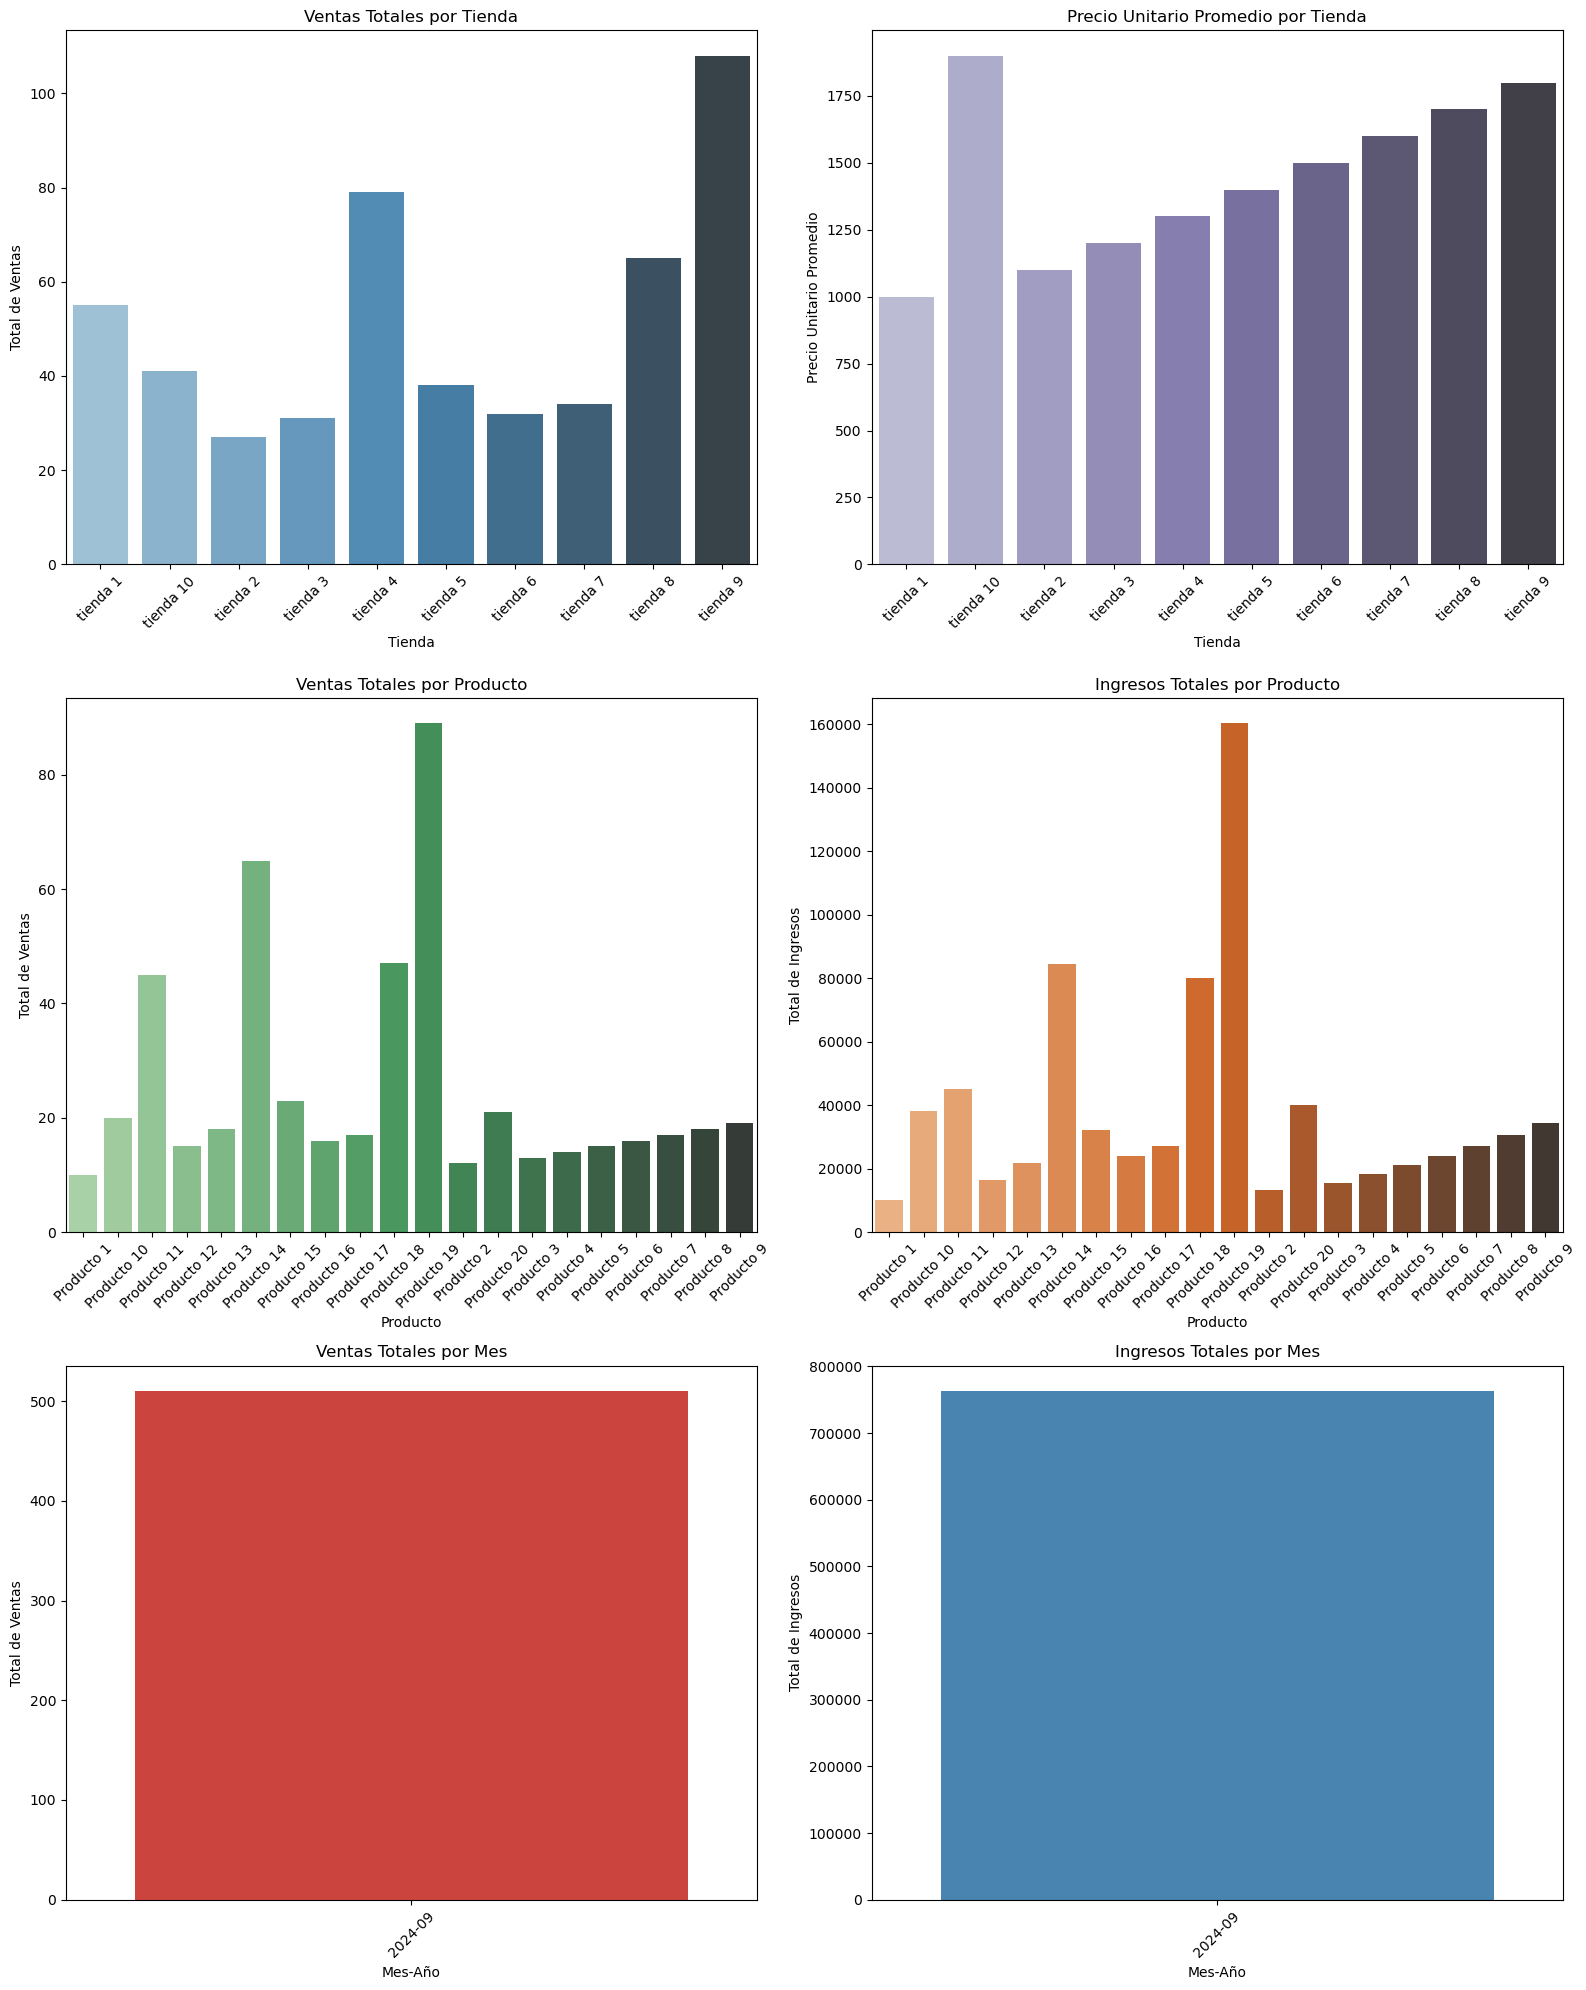

In [62]:
# Extraer el mes y el año de la fecha
df['Mes-Año'] = df['Fecha de venta'].dt.to_period('M')

# Calcular los ingresos por cada fila
df['Ingresos'] = df['Ventas'] * df['Precio Unitario']

# 1. Ventas totales por tienda
ventas_por_tienda = df.groupby('Tienda')['Ventas'].sum()

# 2. Precio unitario promedio por tienda
precio_promedio_por_tienda = df.groupby('Tienda')['Precio Unitario'].mean()

# 3. Ventas totales por producto
ventas_por_producto = df.groupby('Nombre del producto')['Ventas'].sum()

# 4. Ingresos totales por producto
ingresos_por_producto = df.groupby('Nombre del producto')['Ingresos'].sum()

# 5. Ventas totales por mes
ventas_por_mes = df.groupby('Mes-Año')['Ventas'].sum()

# 6. Ingresos totales por mes
ingresos_por_mes = df.groupby('Mes-Año')['Ingresos'].sum()

# Crear gráficos
plt.figure(figsize=(16, 20))

# 1. Ventas totales por tienda
plt.subplot(3, 2, 1)
sns.barplot(x=ventas_por_tienda.index, y=ventas_por_tienda.values, palette="Blues_d")
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)

# 2. Precio unitario promedio por tienda
plt.subplot(3, 2, 2)
sns.barplot(x=precio_promedio_por_tienda.index, y=precio_promedio_por_tienda.values, palette="Purples_d")
plt.title('Precio Unitario Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Precio Unitario Promedio')
plt.xticks(rotation=45)

# 3. Ventas totales por producto
plt.subplot(3, 2, 3)
sns.barplot(x=ventas_por_producto.index, y=ventas_por_producto.values, palette="Greens_d")
plt.title('Ventas Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)

# 4. Ingresos totales por producto
plt.subplot(3, 2, 4)
sns.barplot(x=ingresos_por_producto.index, y=ingresos_por_producto.values, palette="Oranges_d")
plt.title('Ingresos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)

# 5. Ventas totales por mes
plt.subplot(3, 2, 5)
sns.barplot(x=ventas_por_mes.index.astype(str), y=ventas_por_mes.values, hue=ventas_por_mes.index.astype(str), palette="Reds_d", legend=False)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)

# 6. Ingresos totales por mes
plt.subplot(3, 2, 6)
sns.barplot(x=ingresos_por_mes.index.astype(str), y=ingresos_por_mes.values, hue=ingresos_por_mes.index.astype(str), palette="Blues_d", legend=False)
plt.title('Ingresos Totales por Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()